<a href="https://colab.research.google.com/github/patrykolczak96/analiza_rynku_gier/blob/main/analiza_rynku_gier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informatyczne narzędzia wizualizacji danych**





Przedmiotem niniejszej analizy jest zbiór o nazwie Video Game Sales with Ratings pobrany z Kaggle.com
W zbiorze zaprezentowano wyniki sprzedażowe gier wraz z ocenami poszczególnych tytułów z Metacritic.






Cele badania:
1. Zidentyfikowanie zależności na rynku gier w poszczególnych latach.
2. Sprawdzenie czy oceny krytyków mają wpływ na sprzedaż gier.
3. Prześledzenie dynamiki zmian na rynku gier pod względem popularności określonych gatunków gier oraz plaform na któe wydawane są gry.
4. Zauważenie pewnej tendencji, czy gry z któryś lat sprzedawały się lepiej.

# W zbiorze zawarto następujące zmienne:

* Name - nazwa gry
* Platform - platofrma na której gra została wydana
* YearofRelease - rok wydania gra 
* Genre - gatunek gry
* Publisher - wydawca gry
* NASales - liczba sprzedanych egzemplarzy w Ameryce Północnej
* EUSales - liczba sprzedanych egzemplarzy w Europie
* JPSales - liczba sprzedanych egzemplarzy w Japoni
* OtherSales - pozostała liczba sprzedanych egzemplarzy
* Global_Sales - łączna liczba sprzedanych egzemplarzy
* Critic_score - zagregowana ocena znajdująca się na portalu Metacritic
* Criticcount - Liczba osób wystawaiająca ocenę danej grze
* User_score - Ocena wystawiona przez użytkowników portalu Metacritic
* Usercount - Liczba użytkowników portalu Metacritic, która wystawiła ocenę danej grze
* Developer - Deweloper gry
* Rating - Ranking wg klasyfikacji ESRB



Pierwszym krokiem w analizie było zaimportowanie potrzebnych bibliotek w celu pracy na danych oraz wizualizacji danych.

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

**Wprowadzenie do zbioru danych**

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(16719, 16)

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.describe(include=[np.number])

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
df.describe(exclude=[np.number])

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,16719
unique,11562,31,12,581,96,1696,6
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,Unknown
freq,12,2161,3370,1356,2425,204,6772


**Przekształcanie danych**

Przekształcamy user_score z obiektu na float, wykorzystamy go potem w pair plot.

Przekształcamy również rok, był poprzednio przechowywany jako float

In [ ]:
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')

df['Year_of_Release'] = df['Year_of_Release'].dropna().apply(np.int64)

In [ ]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Przekształcamy rating w celu lepszej pracy na danych - nieznane oznaczenia z serwisu https://www.esrb.org/ratings-guide/ zmieniamy na nazwy dla kategorii sugerującej odpowiedni wiek dla danej gry.

Kategorie, które mają liczebność do 10 wystąpień dopasowujemy do liczniejszych kategorii

In [ ]:
df['Rating'].nunique()

8

In [ ]:
list(df['Rating'].unique())

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [ ]:
df['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [ ]:
df['Rating'] = ['Everyone' if x == 'E' or x == 'K-A' 
       else 'Adults' if x == 'M' or x == 'AO'
       else 'Teens' if x == 'T' 
       else 'Kids' if x == 'E10+' or x == 'EC'
       else float('NaN') for x in df['Rating'] ]

In [ ]:
list(df['Rating'].unique())

['Everyone', nan, 'Adults', 'Teens', 'Kids']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


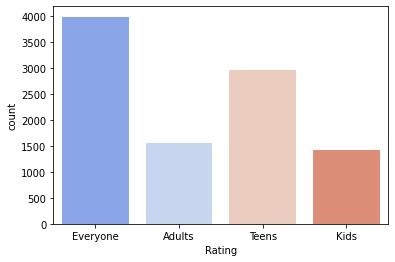

In [ ]:
sns.countplot(df['Rating'], palette='coolwarm')

**Wizualizacja danych**

Przedstawienie platform i liczebności gier dla danej platformy.

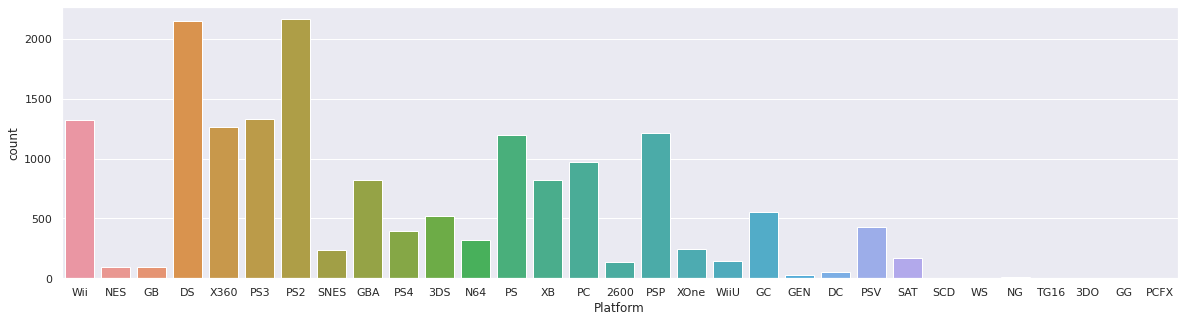

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x = df["Platform"])

1.   Z przeprowadzonej analizy można zauważyc, że z powodu posiadania danych jedynie do końca 2016 roku przeważają konsole starszych generacji.

2.   Najpopularniejszą platofrma wg stanu na **22 grudnia 2016 roku** była PlayStation 2.



Następnym krokiem było sprawdzenie jak prezentowała się liczba sprzedawanych egzemplarzy gier wydanych w określonych datach.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


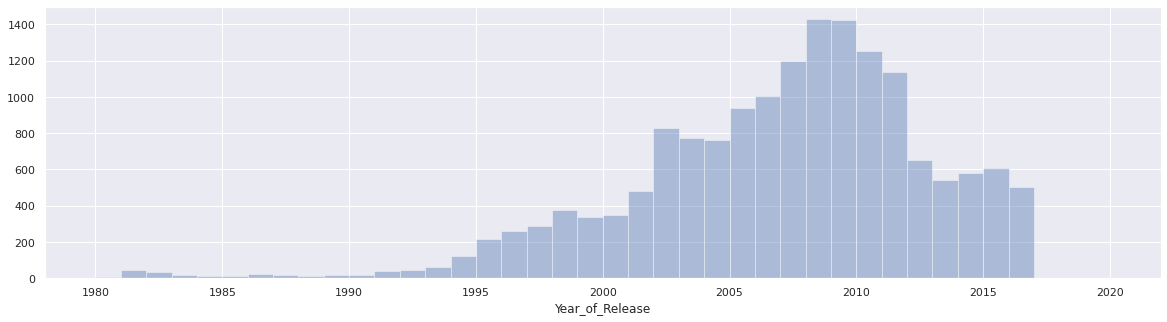

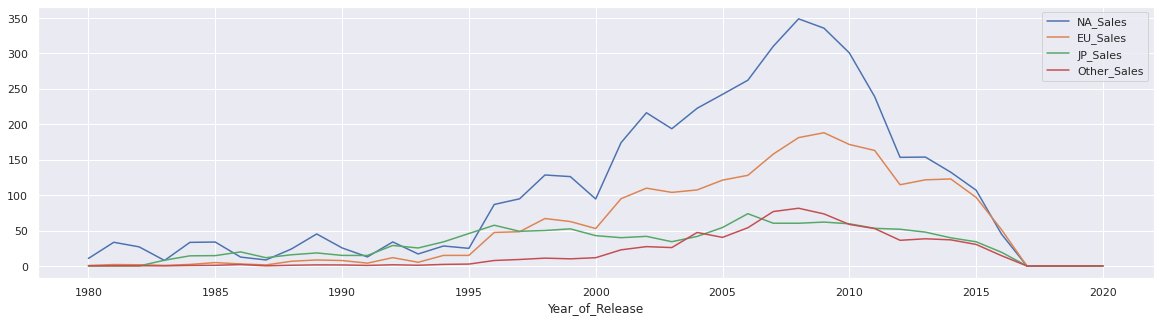

In [ ]:
sns.distplot(df["Year_of_Release"], kde=False, bins = 40)
sales_df = df[[x for x in df.columns if 'Sales' in x and 'Global_Sales' not in x]+['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

1. Do końca 2010 roku liczba sprzedawanych gier dla tytułów wydanych w tych latach każdego roku wzrastała.
2. Największą sprzedażą cieszą się gry wyprodukowane pod koniec pierwszej dekady XXI wieku.
3. Od tego czasu zauważalna jest tendencja spadkowa.
4. Pod względem obszarów geogaficznych największym rynkiem zbytu jest Ameryka Północna.
5. Znaczący wzrost sprzedaży tytułów wydanych na koniec pierwszej dekady XXI wieku w Ameryce Północnej przyczynił się do ogólnego wzrostu liczby sprzedawanych gier w tym okresie.

Platformy pod względem sprzedaży

<bound method DataFrame.groupby of                                 Name Platform  ...  Developer Rating
0                         Wii Sports      Wii  ...   Nintendo      E
1                  Super Mario Bros.      NES  ...        NaN    NaN
2                     Mario Kart Wii      Wii  ...   Nintendo      E
3                  Wii Sports Resort      Wii  ...   Nintendo      E
4           Pokemon Red/Pokemon Blue       GB  ...        NaN    NaN
...                              ...      ...  ...        ...    ...
16714  Samurai Warriors: Sanada Maru      PS3  ...        NaN    NaN
16715               LMA Manager 2007     X360  ...        NaN    NaN
16716        Haitaka no Psychedelica      PSV  ...        NaN    NaN
16717               Spirits & Spells      GBA  ...        NaN    NaN
16718            Winning Post 8 2016      PSV  ...        NaN    NaN

[16719 rows x 16 columns]>

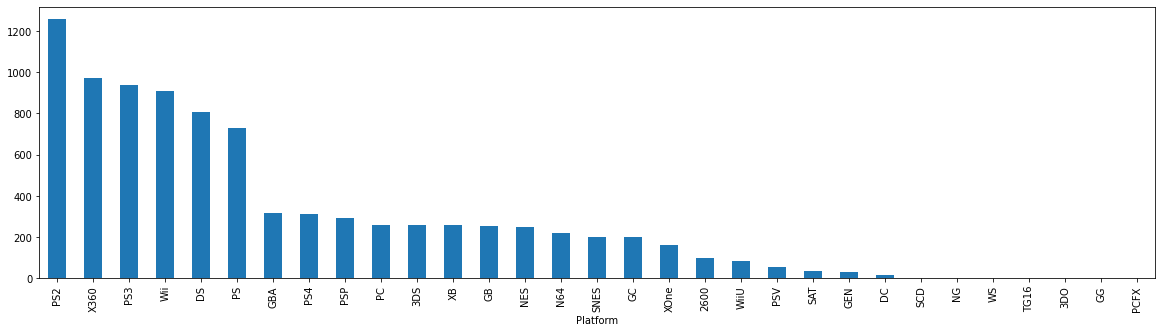

In [ ]:
# size
plt.figure(figsize=(20, 5))

df.groupby('Platform').sum().unstack().Global_Sales.sort_values(ascending=False).plot(kind='bar')
df.groupby

1. Z przeprowadzonej analizy wynika, że najwięcej sprzedanych gier zostało na PS2. Drugie miejsce zajmuje Xbox 360.




In [ ]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS','PC']
df_platform = df.loc[df['Platform'].isin(platforms)]

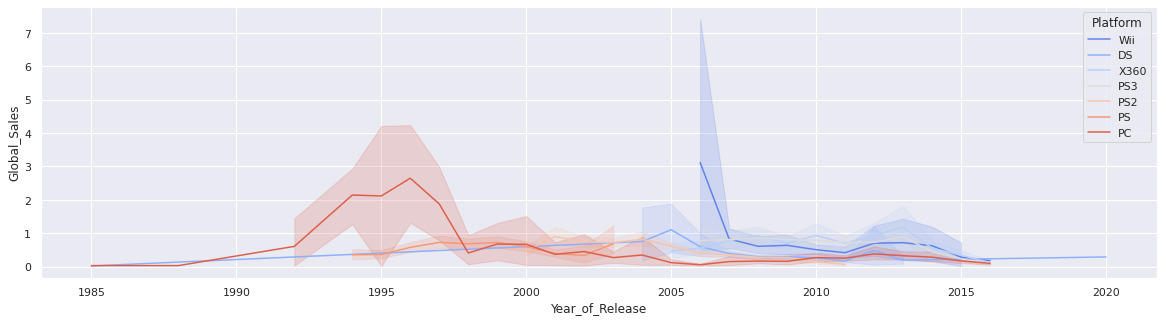

In [ ]:
sns.set(rc={'figure.figsize':(20, 5)})

sns.lineplot(x="Year_of_Release", y="Global_Sales",
             hue="Platform", palette = 'coolwarm',
             data=df_platform)

Następnie przeprowadzono analizę dotyczącą zidentyfikowania najpopularniejszych gatunków gier oraz najpopularniejszych platform pod względem liczby sprzedanych egzemplarzy w poszczególnych latach.



In [ ]:
df_top = df[df["Global_Sales"]>1]# wiecej niz milion
df_top = df_top.dropna(subset=['Genre'])

df_top.shape

(2056, 16)

In [ ]:
import plotly.express as px

fig_genre = px.scatter(df_top, x="Year_of_Release", y="Global_Sales", color = "Genre",
                 width=800, height=300)


fig_platform = px.scatter(df_top, x="Year_of_Release", y="Global_Sales", color = "Platform",
                 width=800, height=400)

fig_genre.show()
fig_platform.show()

1. Występuje znaczą różnica na przestrzeni lat pod względem sprzedaży gier wydanych w określonych latach.
2. Grami z przełomu lat 80. i 90., odnotowującmi dobre wyniki sprzedaży były gry platformowe (zręcznościówki).
3. Z drugiej połowy lat 90. dobrze sprzedającymi się tytułami były gry fabularne (RPG). 
4. W następnych latach nie zauważa się już wyraźnej przewagi jednego z gatunków: istotne są: gry sportowe, akcji, symulatory oraz gry wyścigowe.
5. Warto odnotować, że bardzo popularne są gry sportowe z 2006 roku, ponieważ osiągnęły bardzo wysoką sprzedaż.
6. Za pomocą powyższego wykresu można jednoznacznie zauważyć etapy zmian popularności poszczególnych platform.


Analiza zależności

Eliminacja outlierów najlepiej i najgorzej sprzedających się gier



In [ ]:
cols = ['Global_Sales']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

filtered = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]
filtered.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1892,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.0,0.14,1.08,88.0,15.0,8.9,77.0,EA Tiburon,E
1893,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002.0,Platform,THQ,0.53,0.41,0.0,0.14,1.08,NaN,NaN,6.6,41.0,Big Sky Software,E
1894,Imagine: Babysitters,DS,2008.0,Simulation,Ubisoft,0.63,0.35,0.0,0.10,1.08,NaN,NaN,tbd,NaN,Visual Impact,E


In [ ]:
filtered.shape

(14827, 16)

Heatmapa

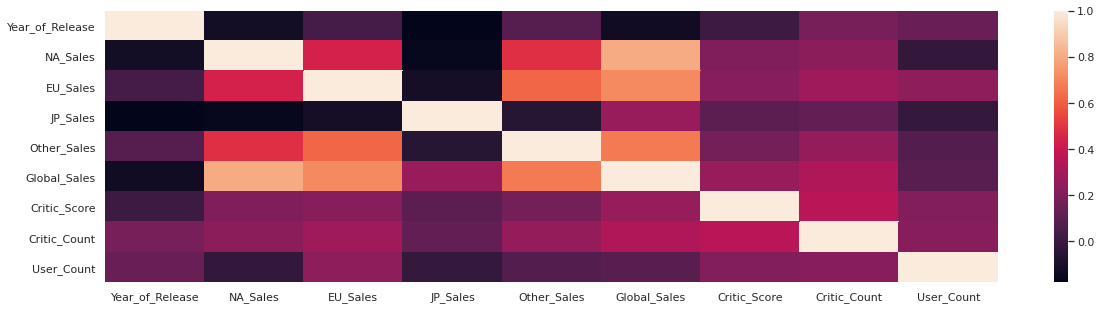

In [ ]:
sns.heatmap(filtered.corr())

1. Z powyższej analizy korelacji można zauważyć, że sprzedaż w krajach Europy oraz Ameryki Północnej jest dość silnie skorelowana, podobnie jak sprzedaż w Ameryce Północnej i w pozostałych krajach.
2. Co jest dość ciekawym i zaskakującym wnioskem to fakt, że pomiędzy ocenami krytyków a sprzedaż występuje bardzo słaba zależność. W ten sposób można stwierdzić, że liczba sprzedawanych gier nie jest uzależniona od ocen krytyków.


Wykres zależności

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



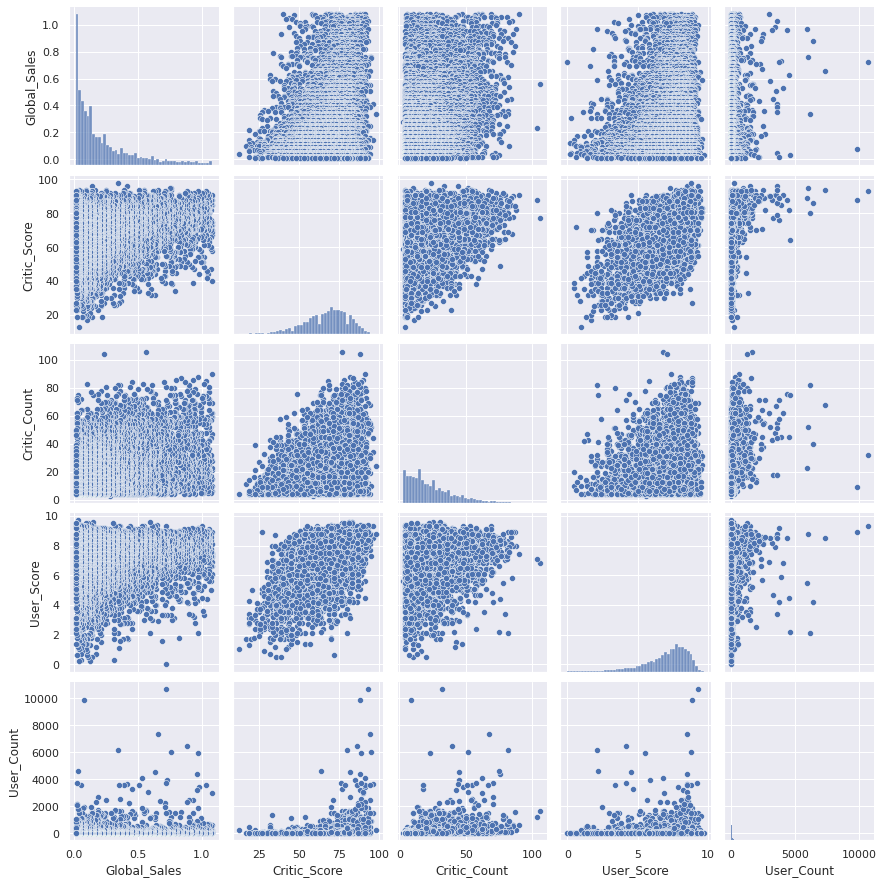

In [ ]:
cols = ['Global_Sales','Critic_Score', 'Critic_Count', 'User_Score','User_Count']
sns_plot = sns.pairplot(filtered[cols])

**Wnioski**



1.   Rynek gier na przestrzeni analizowanego okresu znacząco się zmieniał.
3. Gry wydane na przełomie pierwszej dekady XXI wieku osiągnęły znakomite wyniki pod względem sprzedaży.
4. Za pomocą przedstawionej analizy z łatwością można zauważyć, że każda z platform po pewnym okresie traciła na popularności i była zastępowana przez nowszą gerneracje.


